In [25]:
import get_
import numpy as np
import RegressionModels
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
getter = get_.data_('../data/train.csv')
getter_test = get_.data_('../data/test.csv')
data = getter.read()
data_test = getter_test.read()

In [3]:
data

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215
499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617
499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487


In [4]:
data_test

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479
499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747
499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464


In [5]:
dtl,outliers = getter.zScore(data)

In [6]:
dtl_test,outliers_test = getter_test.zScore(data_test)
dtl_test

{'cont1': 0,
 'cont2': 0,
 'cont3': 0,
 'cont4': 0,
 'cont5': 0,
 'cont6': 0,
 'cont7': 1355,
 'cont8': 0,
 'cont9': 3537,
 'cont10': 29,
 'cont11': 0,
 'cont12': 0,
 'cont13': 0,
 'cont14': 0}

In [7]:
dtl

{'cont1': 0,
 'cont2': 0,
 'cont3': 0,
 'cont4': 0,
 'cont5': 0,
 'cont6': 0,
 'cont7': 1829,
 'cont8': 0,
 'cont9': 5489,
 'cont10': 41,
 'cont11': 0,
 'cont12': 0,
 'cont13': 0,
 'cont14': 0,
 'target': 87}

In [8]:
getter.norm_data(data)

In [9]:
getter_test.norm_data(data_test)
data_test

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479
499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747
499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464


In [10]:
data

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215
499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617
499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487


In [11]:
target = data['target']
train = data.drop('target',axis=1)
train = train[['cont2','cont3','cont4','cont5','cont8','cont9','cont14']]
predict_data = data_test[['cont2','cont3','cont4','cont5','cont8','cont9','cont14']]
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=42)

## ordinary least square

In [26]:
ols_model = RegressionModels.OLS()
model_1 = LinearRegression()

In [29]:
coeff,intercept = ols_model.fit(x_train,y_train)
predicts_ols = ols_model.prediction(x_test,coeff[:7],coeff[-1])
coeff,intercept

ValueError: shapes (58515,8) and (7,) not aligned: 8 (dim 1) != 7 (dim 0)

In [31]:
model_1.fit(x_train,y_train)
model_1.score(x_test,y_test)*100

0.781985018823117

In [14]:
ols_model.score(y_test,predicts_ols)

(-45145501745.88523, 23976922649.33872)

## gradient descent

In [32]:
gd_model = RegressionModels.GradientDecent()

In [16]:
w_gd,cost = gd_model.fit(x_train,y_train,0.01,10001)
predicts_gd = gd_model.prediction(x_test,w_gd)
w_gd

array([0.02943797, 0.96906717, 0.27821879, 0.10073335, 0.24068633,
       0.46723126, 0.19985459, 6.73873053])

In [17]:
gd_model.score(y_test,predicts_gd)

(-0.040263943005924396, 0.5524875598058896)

## ridge regularization

In [37]:
ridge_model = RegressionModels.RidgeRegression(alpha=500)
model_2 = Ridge(alpha=1)

In [39]:
w_r,cost_r = ridge_model.fit(x_train,y_train,0.01,10001)
predicts_R = ridge_model.prediction(x_test,w_r)
w_r

array([0.03581563, 0.97922336, 0.28480317, 0.10856514, 0.24770482,
       0.47470985, 0.20882392, 6.71020808])

In [38]:
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)*100

0.781982844751461

In [40]:
ridge_model.score(y_test,predicts_R)

(-0.042646960169219206, 0.5537531879634127)

## lasso regularization

In [20]:
lasso_model = RegressionModels.LassoRegression(alpha=50)

In [21]:
w_l,cost_l = lasso_model.fit(x_train,y_train,0.01,10001)
predicts_L = lasso_model.prediction(x_test,w_l)
w_l

array([0.02910647, 0.96737733, 0.27754727, 0.10001152, 0.24020659,
       0.46568702, 0.19897929, 6.74175754])

In [24]:
lasso_model.score(y_test,predicts_L)

(-0.03998412562449949, 0.5523389478855263)

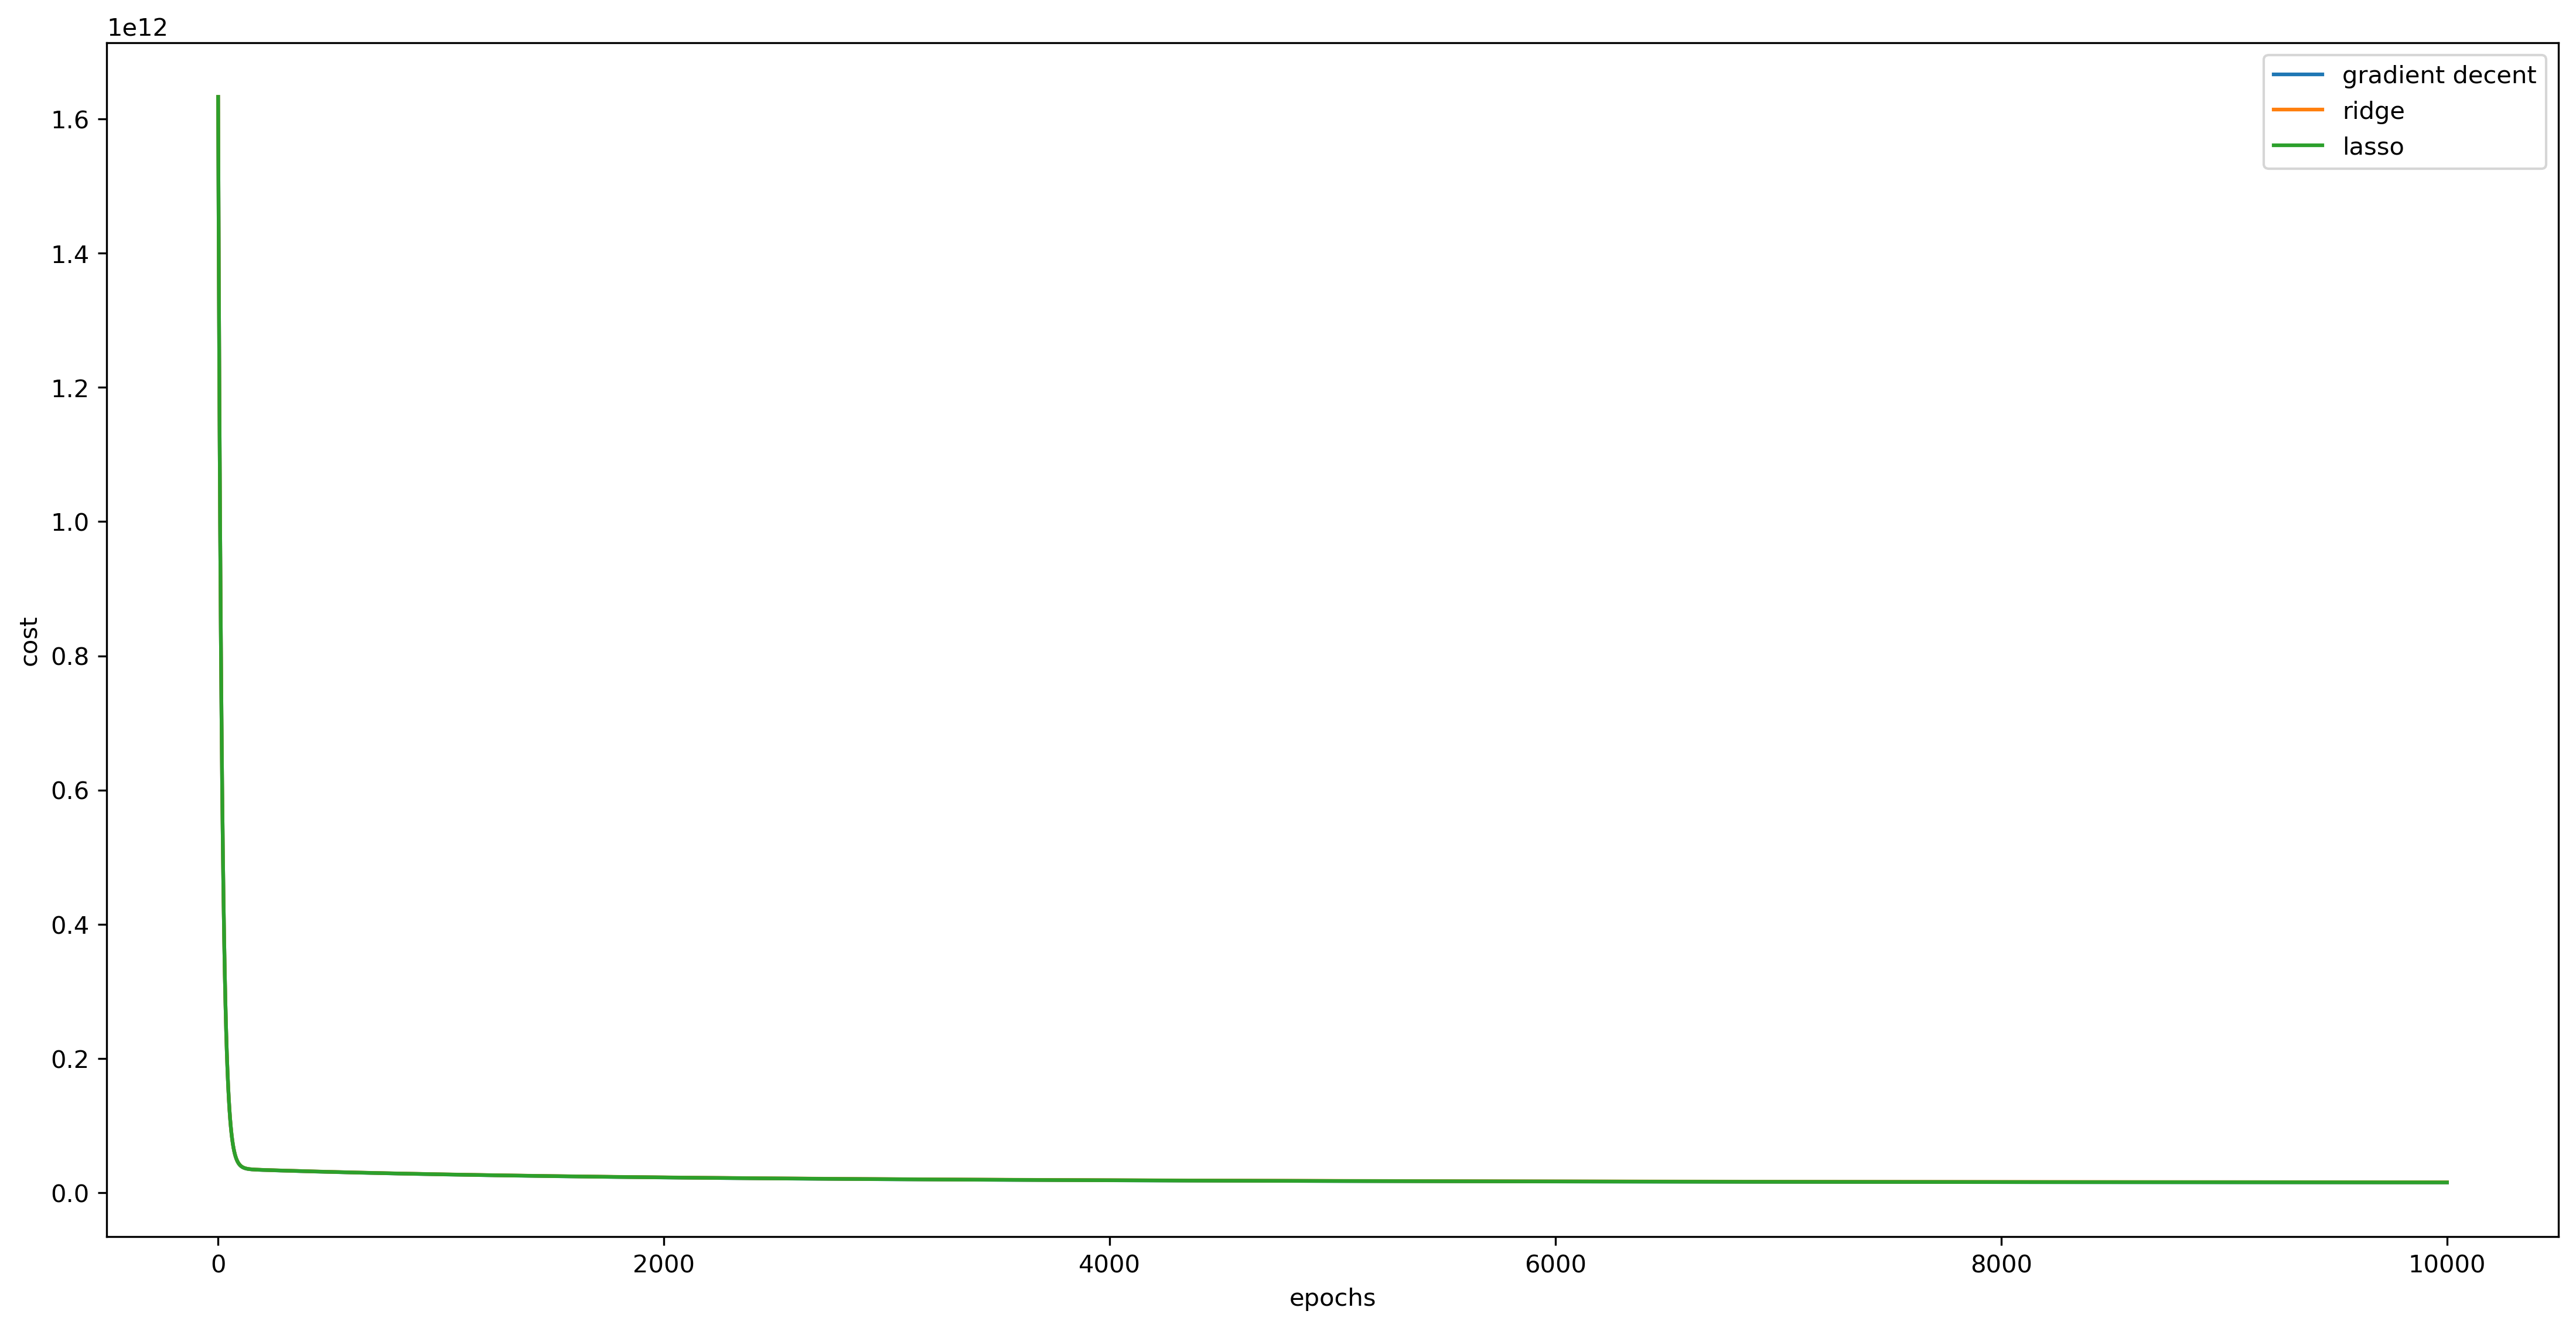

In [22]:
x = np.arange(len(cost))
y = cost

plt.figure(figsize=[18,9],dpi=300)
sns.lineplot(x=x,y=y,label='gradient decent')
sns.lineplot(x=x,y=cost_r,label='ridge')
sns.lineplot(x=x,y=cost_l,label='lasso')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()